In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
C:\Users\shash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\shash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
from keras.models import load_model

IMAGE_SIZE = [224, 224]

train_path = r'S:\VIT AP\SummerInternship1\COVID 19\train'
valid_path = r'S:\VIT AP\SummerInternship1\COVID 19\test'

In [3]:
# add preprocessing layer
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [4]:
# layers
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(7, activation='softmax')(x)

In [5]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [6]:
# view the structure of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [7]:
# telling the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [8]:
#resizing the images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
training_set = train_datagen.flow_from_directory(r'S:\VIT AP\SummerInternship1\COVID 19\train',
                                                 target_size = (224, 224),
                                                 batch_size = 1,
                                                 class_mode = 'categorical')

Found 289 images belonging to 7 classes.


In [10]:
test_set = test_datagen.flow_from_directory(r'S:\VIT AP\SummerInternship1\COVID 19\test',
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical')

Found 76 images belonging to 7 classes.


In [11]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
) 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
289/289 [==============================] - 75s 260ms/step - loss: 5.4903 - acc: 0.5190 - val_loss: 6.0389 - val_acc: 0.5658
Epoch 2/50
289/289 [==============================] - 75s 260ms/step - loss: 4.8711 - acc: 0.6609 - val_loss: 6.4815 - val_acc: 0.4211
Epoch 3/50
289/289 [==============================] - 76s 262ms/step - loss: 5.1579 - acc: 0.6194 - val_loss: 8.8524 - val_acc: 0.2237
Epoch 4/50
289/289 [==============================] - 81s 280ms/step - loss: 4.8019 - acc: 0.6644 - val_loss: 6.2812 - val_acc: 0.5395
Epoch 5/50
289/289 [==============================] - 95s 327ms/step - loss: 4.7547 - acc: 0.6782 - val_loss: 5.9557 - val_acc: 0.6053
Epoch 6/50
289/289 [==============================] - 94s 324ms/step - loss: 4.7095 - acc: 0.6920 - val_loss: 6.2916 - val_acc: 0.5526
Epoch 7/50
289/289 [==============================] - 89s 307ms/step - loss: 4.8771 - acc: 0.674

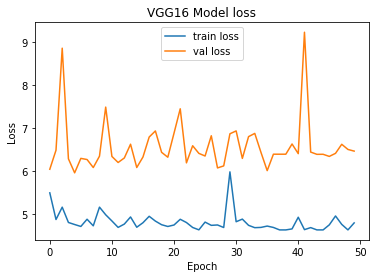

<Figure size 432x288 with 0 Axes>

In [12]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.title('VGG16 Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
plt.savefig('LossVal_loss')

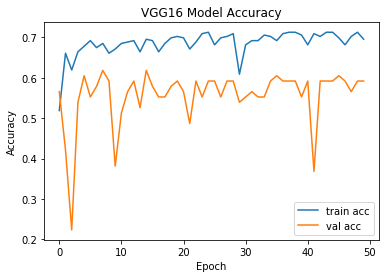

<Figure size 432x288 with 0 Axes>

In [13]:
# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.title('VGG16 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
plt.savefig('AccVal_acc')

In [14]:
import tensorflow as tf
from keras.models import load_model

In [15]:
model.save(r'S:\Summer Internships\2020\covidchest_vgg1.h5')

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [17]:
predict = model.predict_generator(test_set, steps=len(test_set), verbose=1)
test_label = test_set.classes

76/76 [==============================] - 24s 314ms/step


In [19]:
#confusion matrix
print('Confusion Matrix')
confusion_matrix(test_label, predict.argmax(axis=1))

Confusion Matrix


array([[ 0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  6, 13,  0,  0,  5],
       [ 0,  0,  1,  6,  0,  0,  5],
       [ 0,  0,  3, 11,  0,  0, 10],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  3,  4,  0,  0,  6]], dtype=int64)

In [20]:
#plot for confusion matrix
import matplotlib.pyplot as plt
import numpy as np
cm = metrics.confusion_matrix(test_labels, predict.argmax(axis=1))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

NameError: name 'metrics' is not defined

In [21]:
#classification report
cr_labels = list(test_set.class_indices.keys())
classification_report(test_labels, predict.argmax(axis=1), target_names=cr_labels)

NameError: name 'test_labels' is not defined

In [ ]:
#accuracy score
preds = model.evaluate_generator(test_set)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

#### Done!